In [95]:
"""
In this attempt, I will not attempt to resample the RTSTRUCT fie but will try to resample
the array produced, by the rt_utils library, from the RTSTRUCT file
"""
import rt_utils
import sys
import numpy as np
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
import SimpleITK as sitk
reader = sitk.ImageSeriesReader()
print("Finished importing libraries.")

Finished importing libraries.


In [97]:
"""
The code in this cell loads in a DICOM series from 'dicom_series_path' and loads in an RTSTRUCT
file from 'rt_struct_path'. The user should make sure the RTSTRUCT file selected is the one that
corresponds to the chosen DICOM series. e.g. in this case both files used are for the LUNG1-001
data set.

The code then prints the Region Of Interest (ROI) names for the user to choose from in 
the next cell.
"""

rtstruct = RTStructBuilder.create_from(
  dicom_series_path="/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/-CT/", 
  rt_struct_path="/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/RTSTRUCT/3-2.dcm"
)

print(rtstruct)
print("The ROI names in this RTSTRUCT are:")
print(rtstruct.get_roi_names())

The ROI names in this RTSTRUCT are:
['GTV-1', 'Spinal-Cord', 'Lung-Left', 'Lung-Right']


In [98]:
"""
The code in this cell allows the user to choose the ROI which they wish the code to mask
"""
# Loading the 3D Mask from within the RT Struct
mask_3d = rtstruct.get_roi_mask_by_name("GTV-1") #Put in the name of the ROI

#print(mask_3d)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

134


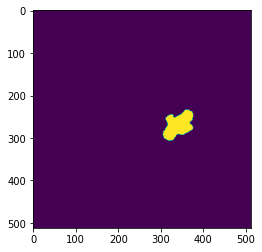

In [99]:
"""
DOES NOT NEED TO BE RUN
The code in this cell produces a plot of a user-selected slice. In the plot the ROI will appear
yellow, and non-ROI will appear purple. Want to change this to black-and-white at some point.
"""
# Display one slice of the region
mask_3d = mask_3d + 1
mask_3d = mask_3d - 1 
irst_mask_slice = mask_3d[:, :, 80] #the number defines which slice will be displayed
print(mask_3d.shape[2]) #prints the number of slices in the image (will be used when making an interactive plot)
plt.imshow(first_mask_slice)
plt.show()

In [100]:
"""
We now have a 3d array which can be used to plot an image we can try to resample this array.
"""
mask_3d = rtstruct.get_roi_mask_by_name("GTV-1") #Put in the name of the ROI

"""
The two lines below convert the array from dtype = bool to dtype = int64
I don't think this is necesary.
"""
mask_3d = mask_3d + 1 
mask_3d = mask_3d - 1


print(mask_3d)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [79]:
img = sitk.GetImageFromArray(mask_3d)
# print(img.GetDirection())

# if sitk.GetArrayFromImage(img).all() == mask_3d.all() :
#     print('True')

# def resample_volume(volume, interpolator = sitk.sitkNearestNeighbor):
#     new_size = [512, 512, 256]
#     resample = sitk.ResampleImageFilter()
#     resample.SetInterpolator(interpolator)
#     resample.SetOutputDirection(volume.GetDirection())
#     resample.SetOutputOrigin(volume.GetOrigin())
#     resample.SetSize(new_size)
#     resample.SetOutputSpacing([1, 1, 4])
#     resample.SetDefaultPixelValue(-1024)


# reader = sitk.ImageSeriesReader()
# volume = img
# x=resample_volume(volume)
# sitk.WriteImage(x, "/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/RTSTRUCT_resample/3-2.nii")


# """
# https://www.programcreek.com/python/example/123390/SimpleITK.ResampleImageFilter example 4
# """
# def resample_image(itk_image, is_label=True):
#     original_spacing = itk_image.GetSpacing()
#     original_size = itk_image.GetSize()

#     out_size = [int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
#                 int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
#                 int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))]

#     resample = sitk.ResampleImageFilter()
#     resample.SetOutputSpacing([1,1,4])
#     resample.SetSize(out_size)
#     resample.SetOutputDirection(itk_image.GetDirection())
#     resample.SetOutputOrigin(itk_image.GetOrigin())
#     resample.SetTransform(sitk.Transform())
#     resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

#     if is_label:
#         resample.SetInterpolator(sitk.sitkNearestNeighbor)
#     else:
#         resample.SetInterpolator(sitk.sitkBSpline)

#     return resample.Execute(itk_image) 




(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
True


TypeError: Wrong number or type of arguments for overloaded function 'ImageFileWriter_Execute'.
  Possible C/C++ prototypes are:
    itk::simple::ImageFileWriter::Execute(itk::simple::Image const &)
    itk::simple::ImageFileWriter::Execute(itk::simple::Image const &,std::string const &,bool,int)


In [104]:
import os

def resample_volume(volume, interpolator = sitk.sitkNearestNeighbor):
    new_size = [512, 512, 256]
    resample = sitk.ResampleImageFilter()
    resample.SetInterpolator(interpolator)
    resample.SetOutputDirection(volume.GetDirection())
    resample.SetOutputOrigin(volume.GetOrigin())
    resample.SetSize(new_size)
    resample.SetOutputSpacing([1, 1, 4])
    resample.SetDefaultPixelValue(-1024)

    return resample.Execute(volume)


directory = '/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/CT'
output_file = '/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/CT-resampled'


filepath = '/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001'

number_of_patient = 0

for filename in os.listdir(filepath) :
    if "-CT" in filename :
        reader = sitk.ImageSeriesReader()
        dcm_paths = reader.GetGDCMSeriesFileNames(os.path.join(filepath, filename))

        reader.SetFileNames(dcm_paths)
        volume = sitk.ReadImage(dcm_paths)
        number_of_patient +=1
        _3_digit_number_of_patient = '{0:03}'.format(number_of_patient)
        print(_3_digit_number_of_patient)
        print(number_of_patient)
        x = resample_volume(volume)
        sitk.WriteImage(x, "/Users/roryfarwell/Documents/University/Year4/MPhys/DataOrg/LUNG1-001/resampled/LUNG1-001-resampled.nii")

print('print(volume):')
print(volume)
print(volume.GetSpacing())


001
1
print(volume):
Image (0x7f9551de0770)
  RTTI typeinfo:   itk::Image<int, 3u>
  Reference Count: 1
  Modified Time: 99768
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 95142
  UpdateMTime: 99767
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 134]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 134]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 134]
  Spacing: [0.976562, 0.976562, 3]
  Origin: [-249.512, -460.512, -681.5]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.976562 0 0
0 0.976562 0
0 0 3

  PointToIndexMatrix: 
1.024 0 0
0 1.024 0
0 0 0.333333

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7f9551de0a20)
      RTTI typeinfo:   itk::ImportImageContainer<unsig

In [105]:
print('print(x):')
print(x.GetSpacing())

print(x):
(1.0, 1.0, 4.0)
